Exploratory Data Analysis (EDA) - Credit Risk Dataset

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read the csv-file
df = pd.read_csv('../data/processed/credit_risk_cleaned.csv')
print(df.shape)
df.head()

(32566, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,default,credit_history
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.64,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [ ]:
#descriptve statistics
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,credit_history
count,32566,32566,32566,32566,32566,32566,32566,32566
mean,28,65522,5,9588,11,0,0,6
std,6,47103,4,6321,3,0,0,4
min,20,4000,0,500,5,0,0,2
25%,23,38500,2,5000,8,0,0,3
50%,26,55000,4,8000,11,0,0,4
75%,30,79200,7,12200,13,0,0,8
max,94,948000,41,35000,23,1,1,30


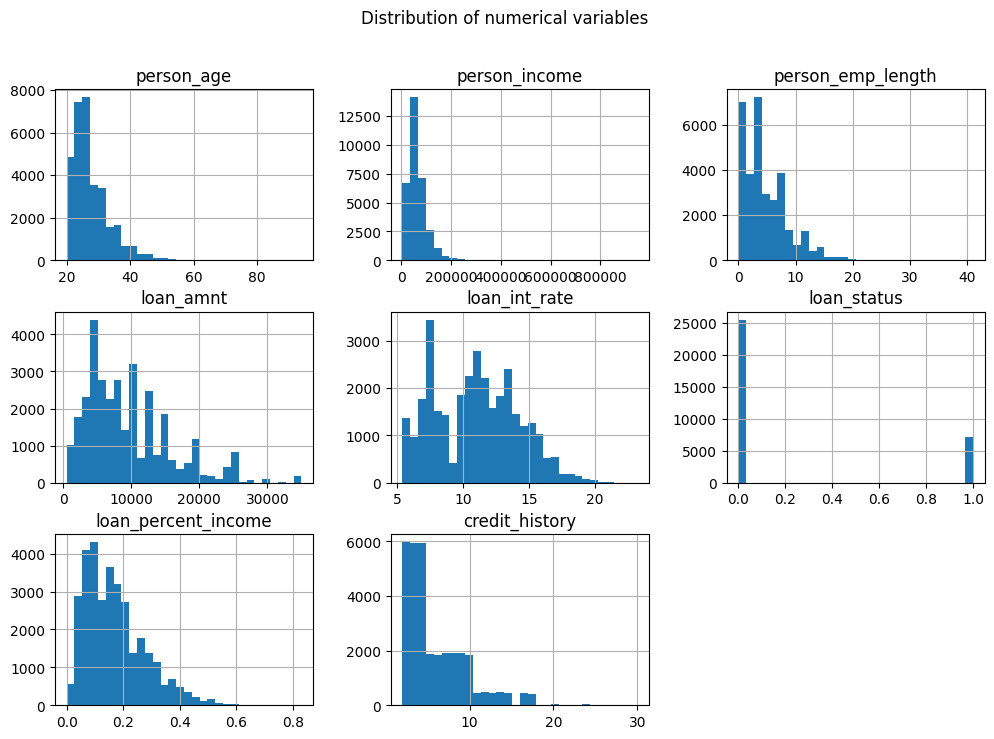

In [84]:
# distributions 
df.hist(figsize=(12,8), bins=30)
plt.suptitle('Distribution of numerical variables')
plt.show;

Default rate:  default
N    26823
Y     5743
Name: count, dtype: int64


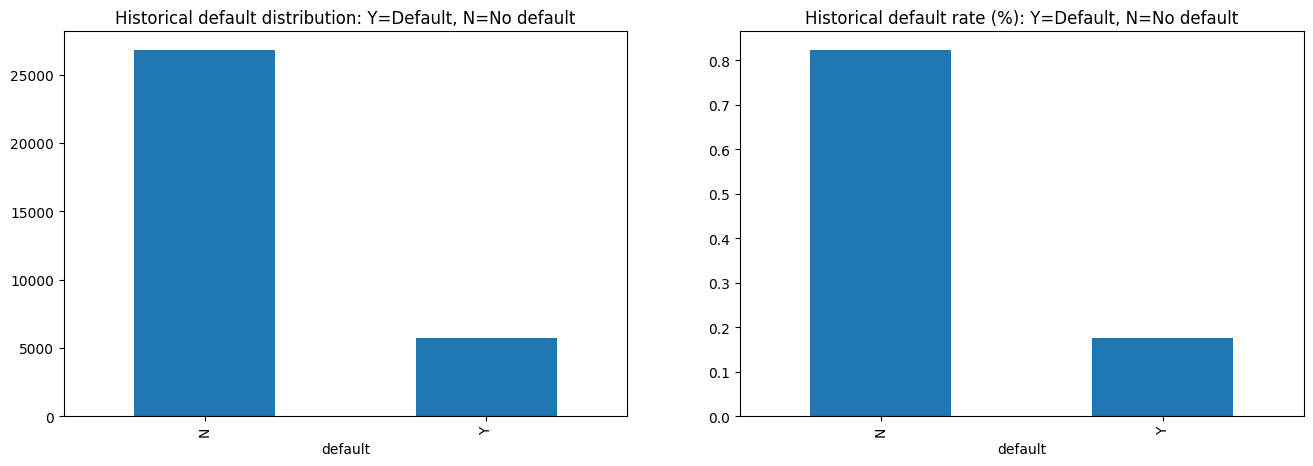

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(16,5))

default_abs = pd.crosstab(index=df['default'],columns='count')
default_pc = pd.crosstab(index=df['default'],columns='count',normalize=True)

print('Default rate: ',df['default'].value_counts())

default_abs.plot(kind='bar',
                 legend=False,
                 title='Historical default distribution: Y=Default, N=No default',
                 ax=ax[0])
default_pc.plot(kind='bar',
                legend=False,
                title='Historical default rate (%): Y=Default, N=No default',
                ax=ax[1]);



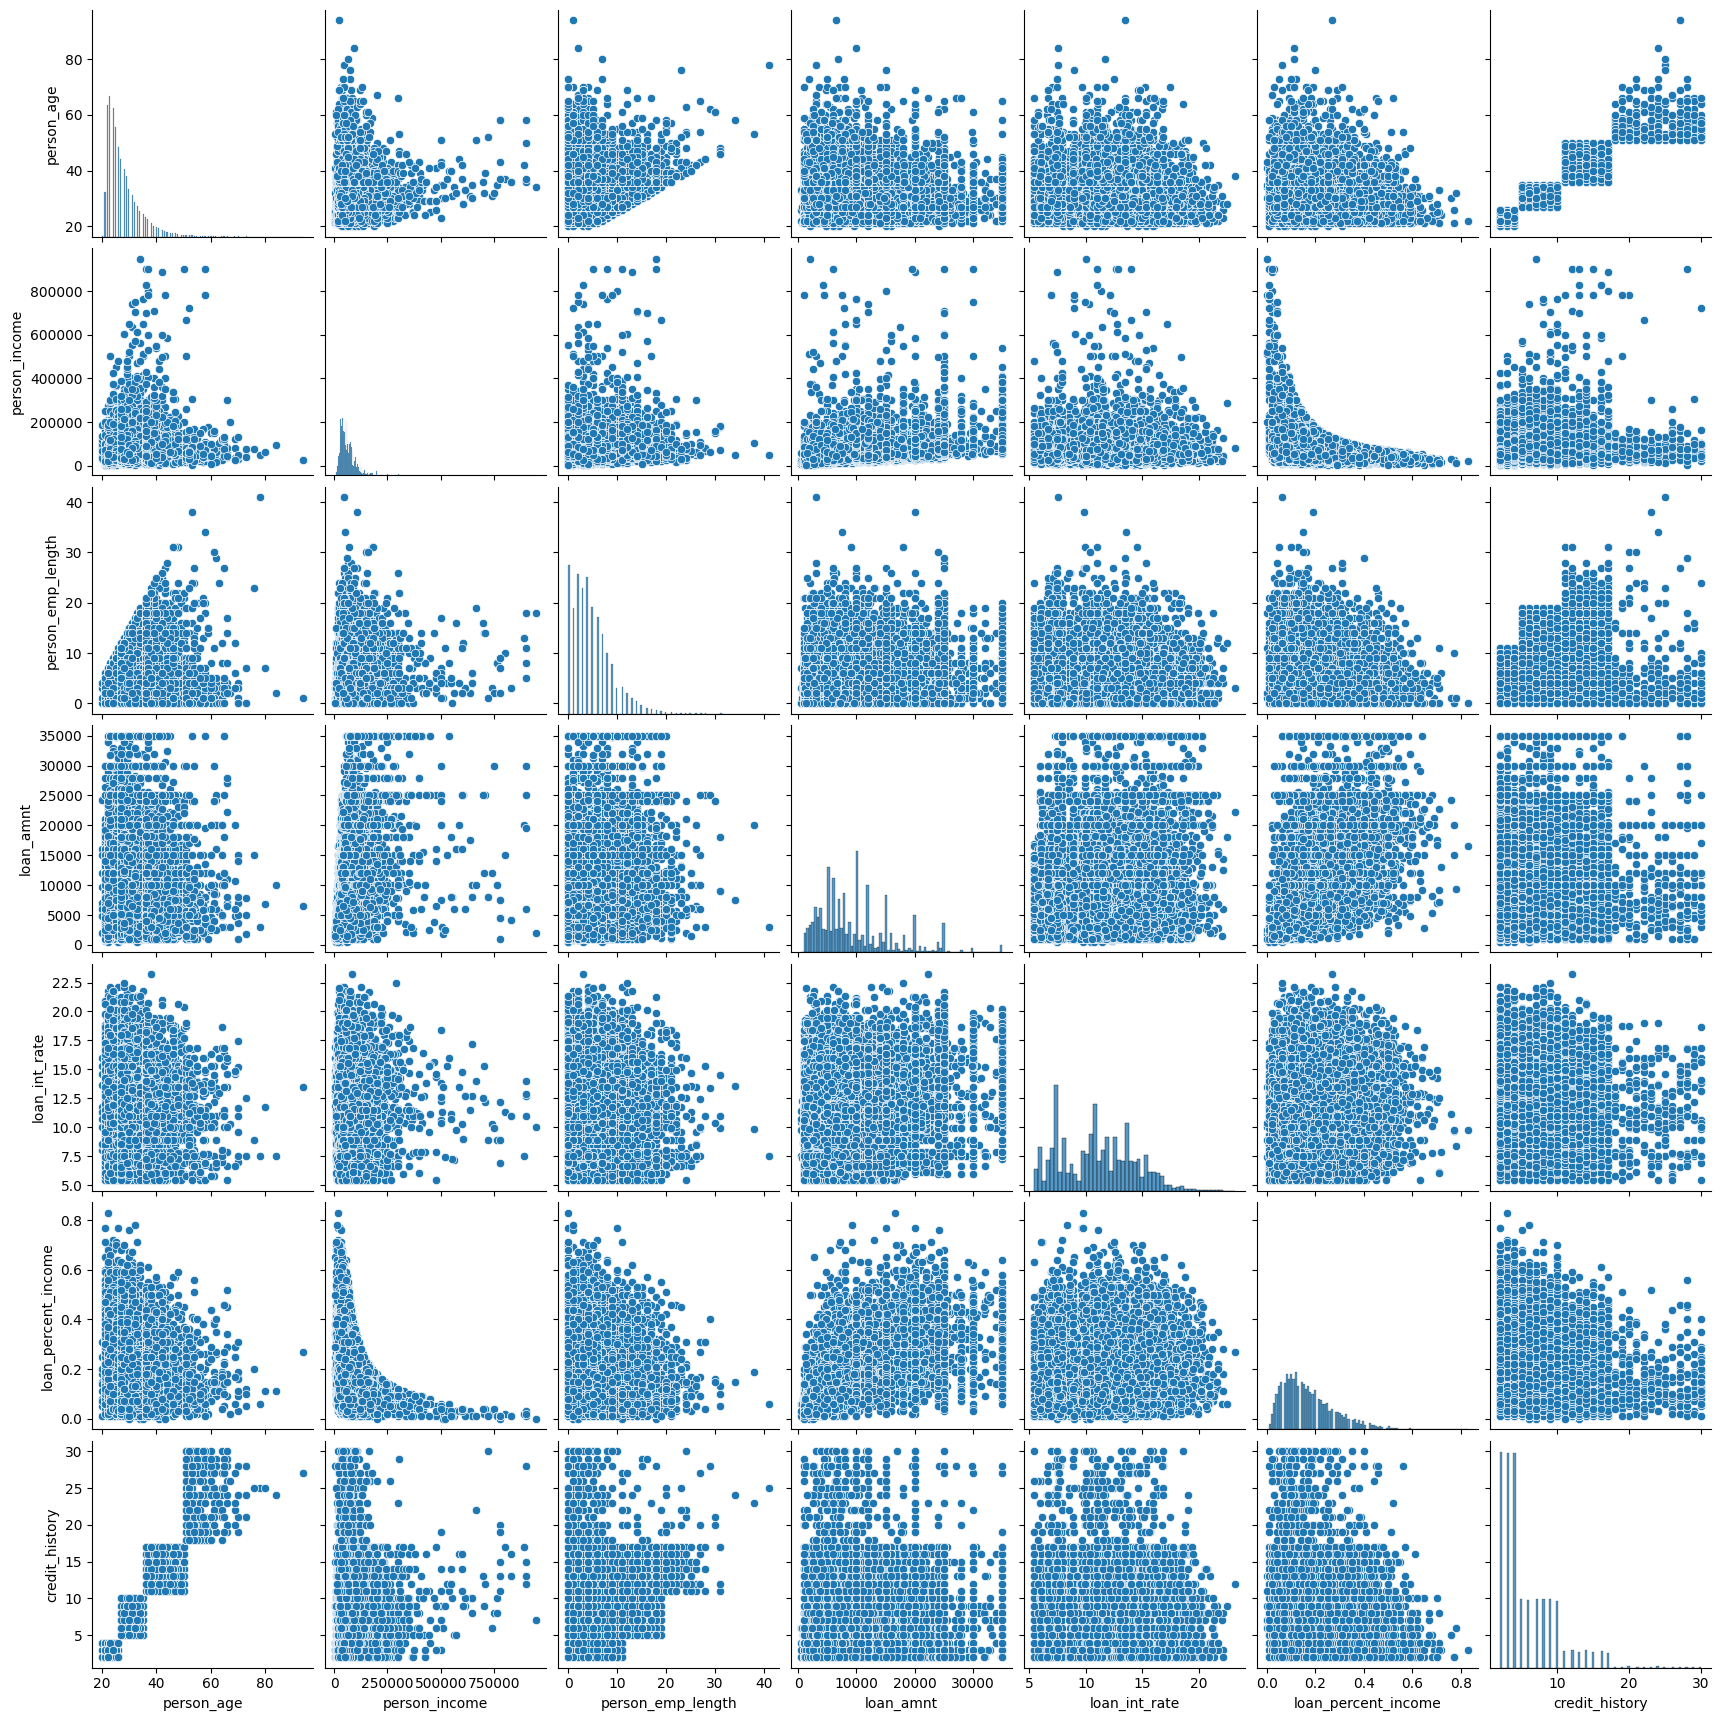

In [ ]:
# Pairplot: distributions and relationships
num_cols = df[['person_age', 'person_income', 'person_emp_length', 
           'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
           'credit_history']]

sns.pairplot(num_cols);

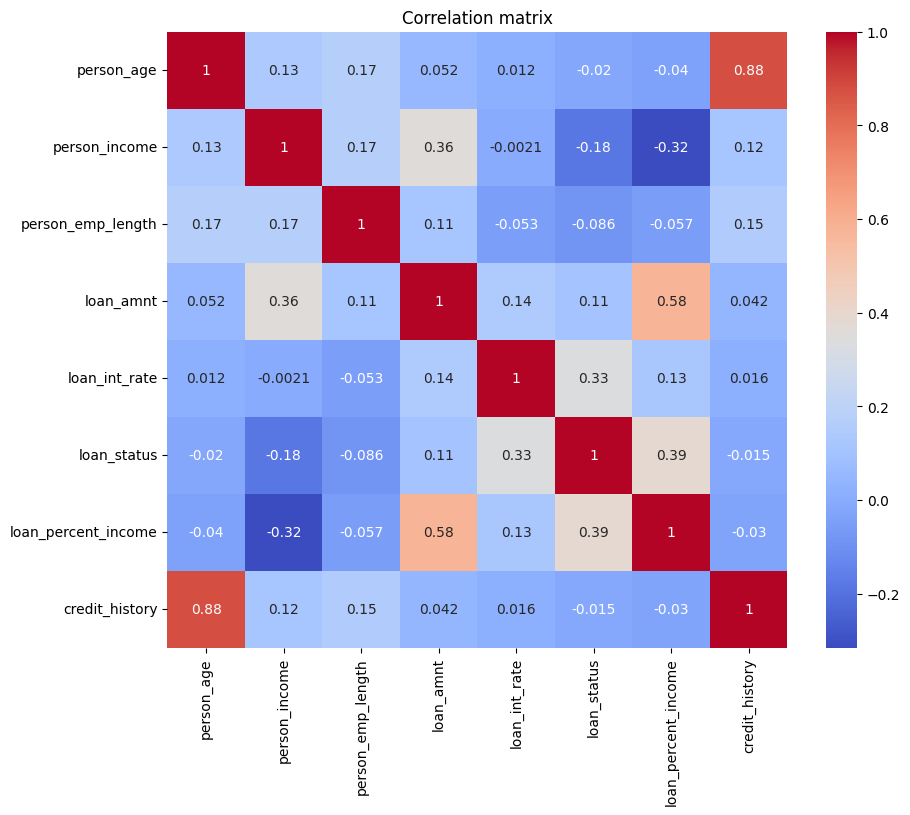

In [ ]:
# correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

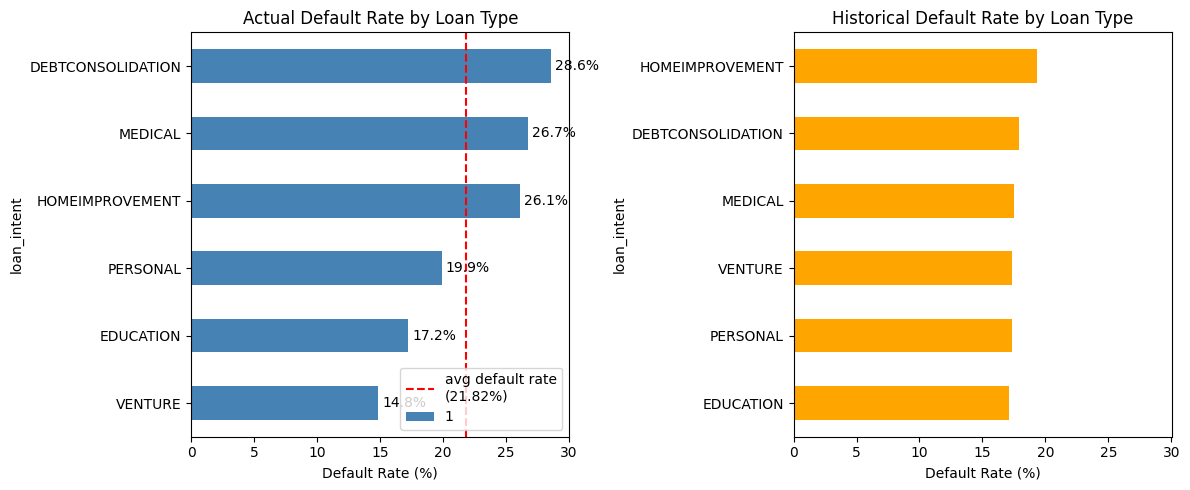

In [98]:
# loan type with the most default

# avarage actual default rate
avg_status_rate = df['loan_status'].mean()*100

# visual
fig, ax = plt.subplots(ncols=2, figsize=(12,5),sharex=True) 

loan_type = ((pd.crosstab(index=df['loan_intent'],
                        columns=df['loan_status'],
                        normalize='index'))*100).sort_values(by=1)
loan_type_hist = ((pd.crosstab(index=df['loan_intent'],
                        columns=df['default'],
                        normalize='index'))*100).sort_values(by='Y')

loan_type[1].plot(kind='barh',
                   title='Actual Default Rate by Loan Type',
                   xlabel='Default Rate (%)',
                   color='steelblue',ax=ax[0])
loan_type_hist['Y'].plot(kind='barh',
                          title='Historical Default Rate by Loan Type',
                          xlabel='Default Rate (%)',
                          color='orange',ax=ax[1])

# put percentage labels on the bars
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

# show avarage line    
ax[0].axvline(avg_status_rate, color='red',
              linestyle='--', 
              label=f'avg default rate\n({avg_status_rate:.2f}%)')
ax[0].legend(loc='lower right');
plt.tight_layout()


Loan Intent
Loans for debt consolidation, medical and home improvement purposes have the highest default rates, whereas personal, education and venture loans show lower-than-average risk.

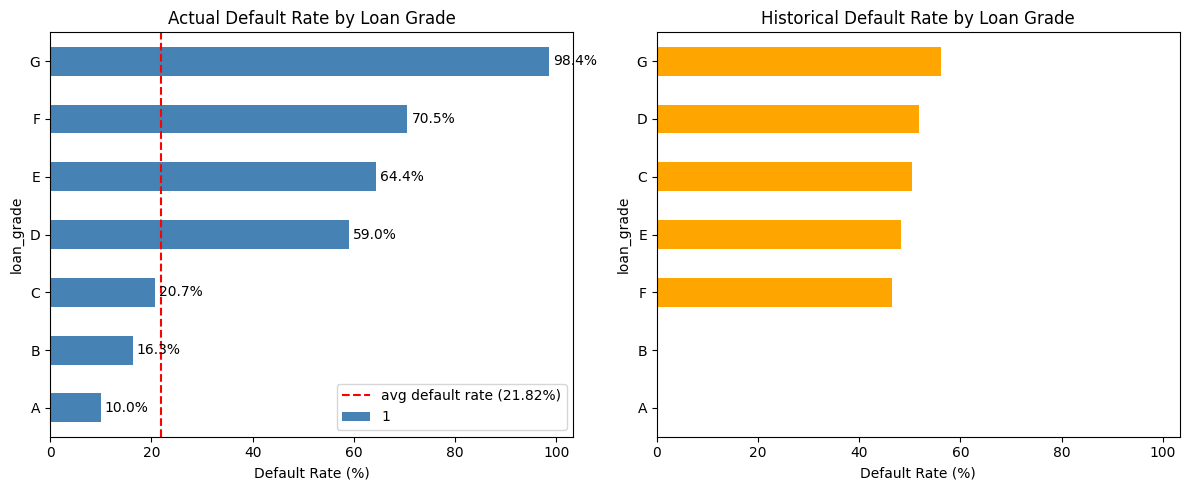

In [ ]:
# which loan grade has the most defaults
fig, ax = plt.subplots(ncols=2, figsize=(12,5),sharex=True) 

loan_grade = ((pd.crosstab(index=df['loan_grade'],
                        columns=df['loan_status'],
                        normalize='index'))*100).sort_values(by=1)
loan_grade_hist = ((pd.crosstab(index=df['loan_grade'],
                        columns=df['default'],
                        normalize='index'))*100).sort_values(by='Y')

loan_grade[1].plot(kind='barh',
                   title='Actual Default Rate by Loan Grade',
                   xlabel='Default Rate (%)',
                   color='steelblue',ax=ax[0])
loan_grade_hist['Y'].plot(kind='barh',
                          title='Historical Default Rate by Loan Grade',
                          xlabel='Default Rate (%)',
                          color='orange',ax=ax[1])

# put percentage labels on the bars
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

# show avarage line
ax[0].axvline(avg_status_rate, color='red', 
              linestyle='--', 
              label=f'avg default rate ({avg_status_rate:.2f}%)')
ax[0].legend(loc='lower right');
plt.tight_layout()

Loan Grade
Borrowers with lower grades (D–G) show a much higher actual default rate than the average (≈ 22 %), while grades A–C are associated with considerably fewer defaults.


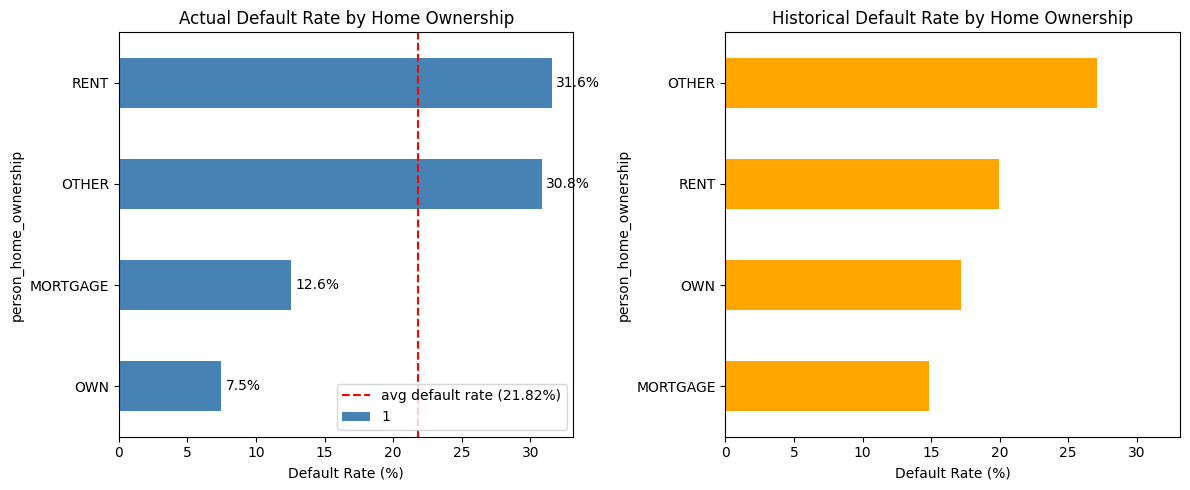

In [96]:
# which typeof home ownership have the most defaults?
fig, ax = plt.subplots(ncols=2, figsize=(12,5),sharex=True) 
home_owner = ((pd.crosstab(index=df['person_home_ownership'],
                            columns=df['loan_status'], 
                            normalize='index'))*100).sort_values(by=1)
home_owner_hist = ((pd.crosstab(index=df['person_home_ownership'],
                            columns=df['default'], 
                            normalize='index'))*100).sort_values(by='Y')


home_owner[1].plot(kind='barh',
                   title='Actual Default Rate by Home Ownership',
                   xlabel='Default Rate (%)',
                   color='steelblue',ax=ax[0])
home_owner_hist['Y'].plot(kind='barh',
                          title='Historical Default Rate by Home Ownership',
                          xlabel='Default Rate (%)',
                          color='orange',ax=ax[1])

# put percentage labels on the bars
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

# show avarage line
ax[0].axvline(avg_status_rate, color='red', 
              linestyle='--', 
              label=f'avg default rate ({avg_status_rate:.2f}%)')
ax[0].legend(loc='lower right');
plt.tight_layout()

Customers with RENT or OTHER show a significantly higher actual default rate than the average (≈ 22%), while homeowners default significantly less often.

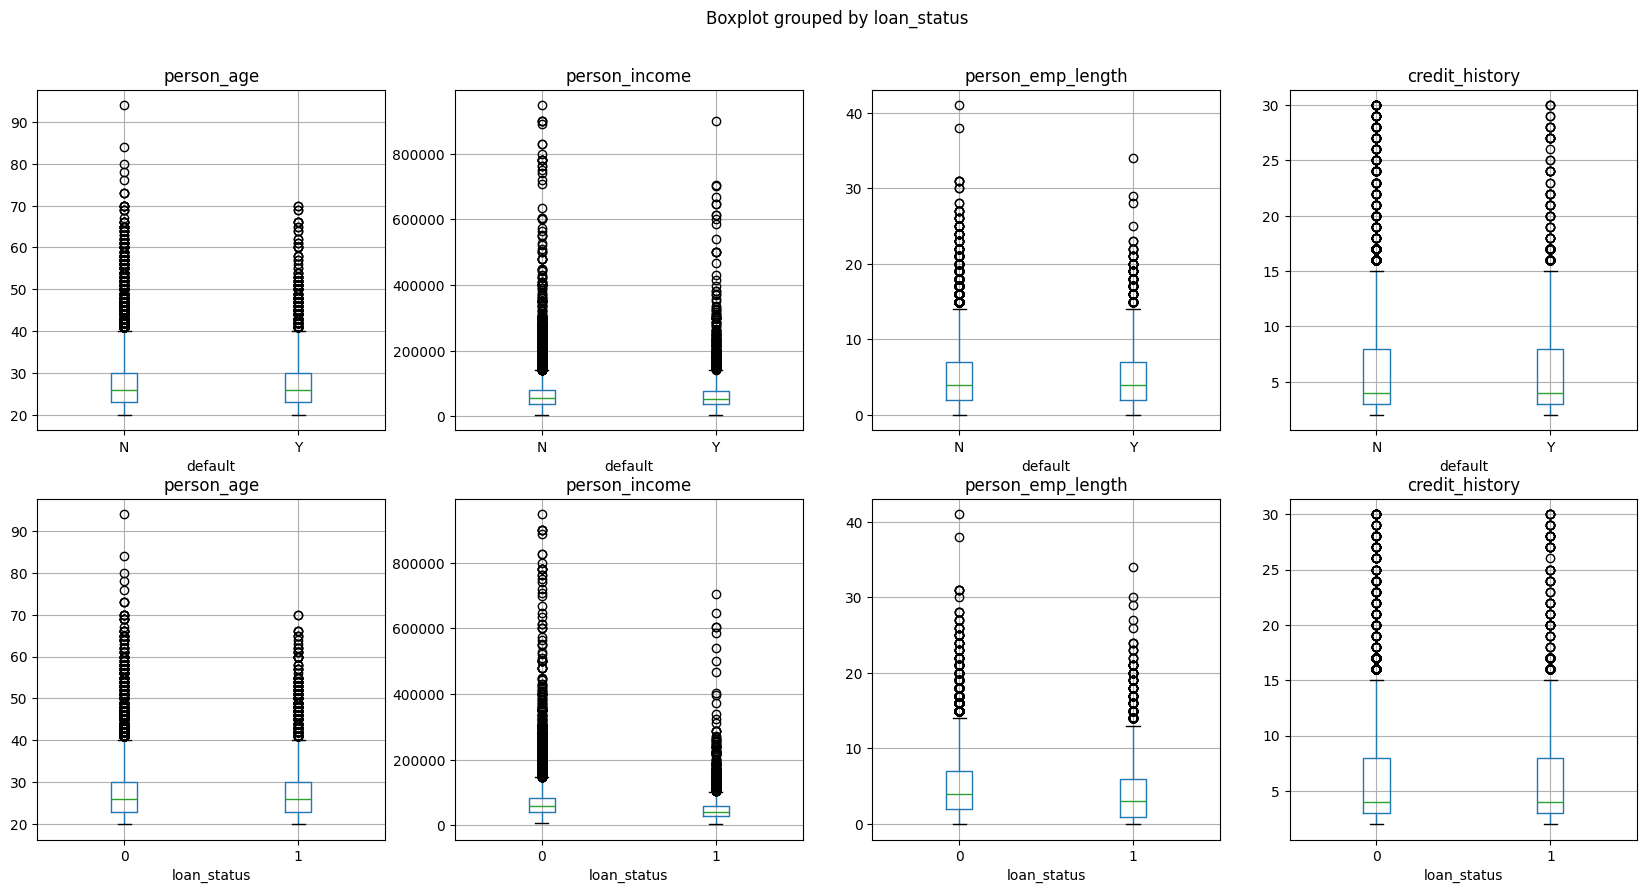

In [ ]:
# boxplots and comparison of actual default with historical default
fig, ax =plt.subplots(nrows=2, ncols=4,figsize=(20,10))

df.boxplot(column='person_age',by='default',ax=ax[0,0])
df.boxplot(column='person_income',by='default',ax=ax[0,1])
df.boxplot(column='person_emp_length',by='default',ax=ax[0,2])
df.boxplot(column='credit_history',by='default',ax=ax[0,3]);

df.boxplot(column='person_age',by='loan_status',ax=ax[1,0])
df.boxplot(column='person_income',by='loan_status',ax=ax[1,1])
df.boxplot(column='person_emp_length',by='loan_status',ax=ax[1,2])
df.boxplot(column='credit_history',by='loan_status',ax=ax[1,3]);
plt.tight_layout()


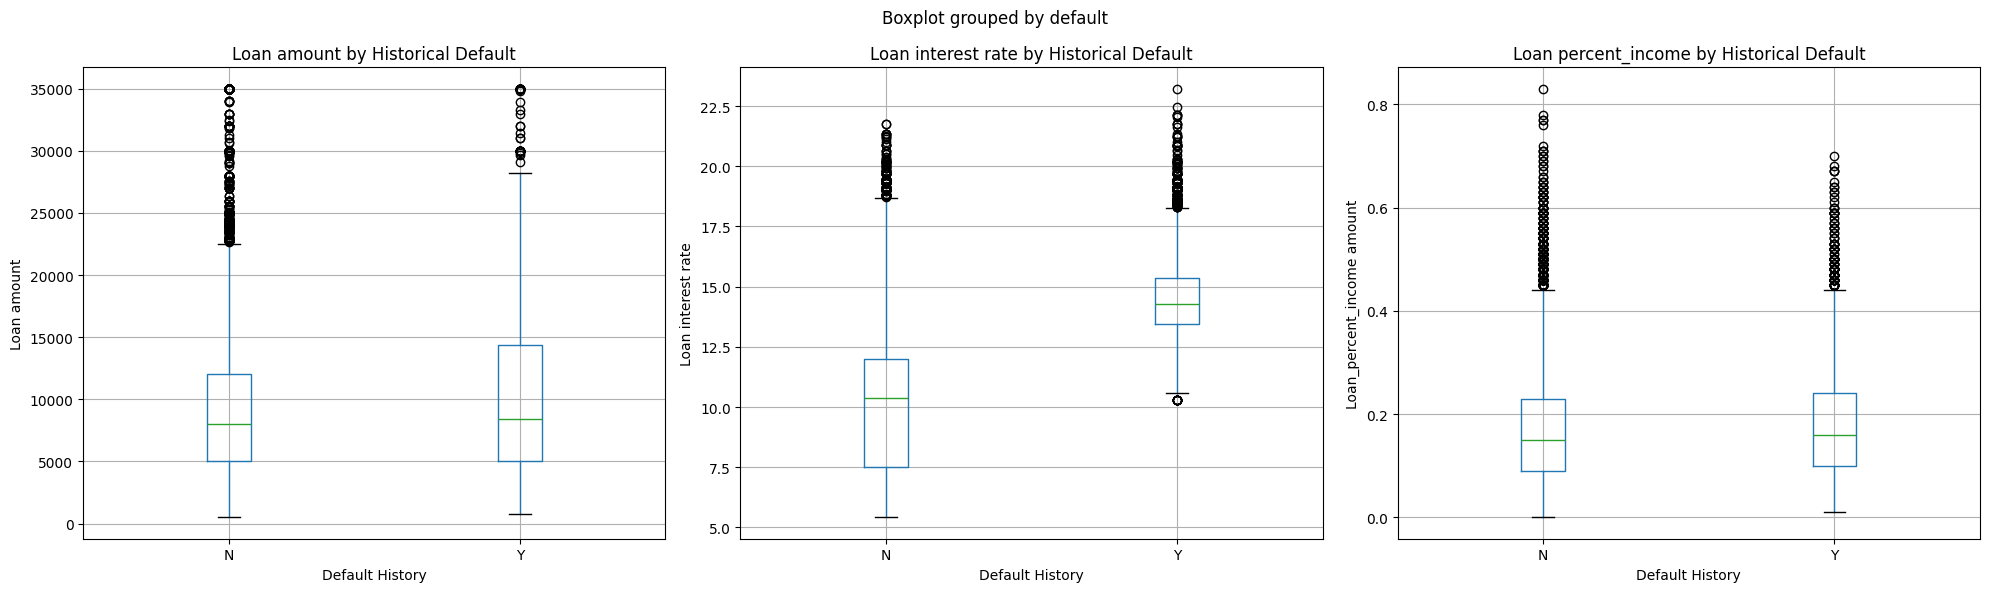

In [38]:
fig, ax =plt.subplots(ncols=3,figsize=(20,6))

df.boxplot(column='loan_amnt',by='default',ax=ax[0])
df.boxplot(column='loan_int_rate',by='default',ax=ax[1])
df.boxplot(column='loan_percent_income',by='default',ax=ax[2])
ax[0].set_title('Loan amount by Historical Default')
ax[0].set_xlabel('Default History')
ax[0].set_ylabel('Loan amount')
ax[1].set_title('Loan interest rate by Historical Default')
ax[1].set_xlabel('Default History')
ax[1].set_ylabel('Loan interest rate')
ax[2].set_title('Loan percent_income by Historical Default')
ax[2].set_xlabel('Default History')
ax[2].set_ylabel('Loan_percent_income amount');
plt.tight_layout()


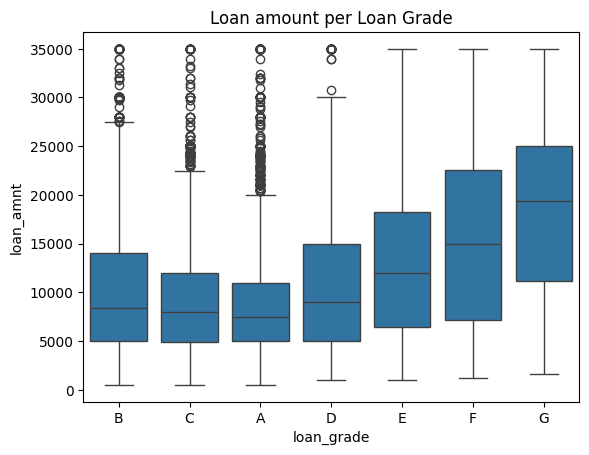

In [25]:
sns.boxplot(x='loan_grade', y='loan_amnt', data=df)
plt.title('Loan amount per Loan Grade');


loan_status  0  1
default          
N           82 18
Y           62 38 

Avarage default rate:  21.82 



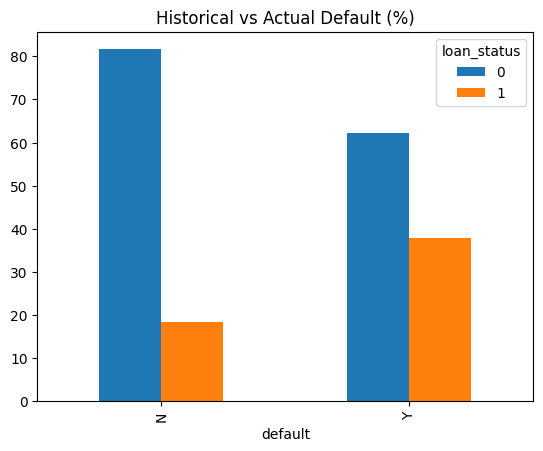

In [79]:
avg_status_rate = df['loan_status'].mean()*100
hist_act_default = (pd.crosstab(df['default'], df['loan_status'], normalize='index')) * 100

print(hist_act_default,'\n')
print('Avarage default rate: ',round(avg_status_rate,2),'\n')
hist_act_default.plot(kind='bar')
plt.title('Historical vs Actual Default (%)');

